In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'dba86915-1536-4a48-9ff7-20356b56be0f',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
#Had to type in "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10" in Command Prompt to increase the data pull limit


In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12224,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.988233e+07,1.988233e+07,False,NaN,1,NaN,NaN,None,2025-06-22T23:11:00.000Z,100736.238653,6.569178e+10,74.8003,0.388075,-0.913916,-4.341042,-6.350577,7.354438,15.327905,2.002871e+12,64.7819,2.115461e+12,None,2025-06-22T23:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-22 19:11:42.013220
1,1027,Ethereum,ETH,ethereum,10354,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207201e+08,1.207201e+08,True,NaN,2,NaN,NaN,None,2025-06-22T23:11:00.000Z,2222.191952,2.934041e+10,98.5022,0.195875,-2.751307,-12.607871,-12.013775,23.077214,7.140760,2.682632e+11,8.6768,2.682632e+11,None,2025-06-22T23:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-22 19:11:42.013220
2,825,Tether USDt,USDT,tether,133412,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.557980e+11,1.578262e+11,True,NaN,3,NaN,NaN,None,2025-06-22T23:10:00.000Z,1.000359,1.027595e+11,85.2418,0.011848,-0.008201,0.024976,0.042341,0.017598,0.000062,1.558539e+11,5.0410,1.578829e+11,None,2025-06-22T23:10:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-22 19:11:42.013220
3,52,XRP,XRP,xrp,1629,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.893865e+10,9.998601e+10,False,NaN,4,NaN,NaN,None,2025-06-22T23:11:00.000Z,2.013150,5.205959e+09,131.4778,1.450703,-1.995462,-7.194317,-12.910640,-9.673942,-17.584409,1.186523e+11,3.8377,2.013150e+11,None,2025-06-22T23:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-22 19:11:42.013220
4,1839,BNB,BNB,bnb,2589,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408859e+08,1.408859e+08,False,NaN,5,NaN,NaN,None,2025-06-22T23:11:00.000Z,615.984064,1.922779e+09,32.7234,0.704124,-1.856480,-4.916433,-6.605659,1.606669,-3.104775,8.678347e+10,2.8070,8.678347e+10,None,2025-06-22T23:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-22 19:11:42.013220
5,5426,Solana,SOL,solana,936,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.310859e+08,6.035793e+08,True,NaN,6,5.252369e+08,6.933021e+10,None,2025-06-22T23:11:00.000Z,131.997987,5.169051e+09,68.2000,0.701820,-1.426400,-13.246855,-24.802834,-12.999566,-5.608293,7.010227e+10,2.2674,7.967125e+10,None,2025-06-22T23:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-22 19:11:42.013220
6,3408,USDC,USDC,usd-coin,28814,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.126217e+10,6.126217e+10,False,NaN,7,6.090122e+10,6.090169e+10,None,2025-06-22T23:10:00.000Z,1.000008,1.381008e+10,114.5254,0.008049,0.001243,0.014361,0.062113,0.012456,-0.002268,6.126264e+10,1.9826,6.126264e+10,None,2025-06-22T23:10:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-06-22 19:11:42.013220
7,1958,TRON,TRX,tron,1187,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.481760e+10,9.481760e+10,True,NaN,8,7.165966e+10,1.889567e+10,None,2025-06-22T23:10:00.000Z,0.263686,1.085473e+09,171.2089,0.577724,-3.409381,-3.653553,-2.476828,6.951675,15.547541,2.500210e+10,0.8087,2.500210e+10,None,2025-06-22T23:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-22 19:11:42.013220
8,74,Dogecoin,DOGE,dogecoin,1239,2013-12-15T00:00:00.000Z,"[mineable, po

In [7]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'dba86915-1536-4a48-9ff7-20356b56be0f',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'/Users/roale/Documents/Web Scraping Python Project/Crypto_API.csv'):
        #df.to_csv(r'/Users/roale/Documents/Web Scraping Python Project/Crypto_API.csv', header='column_names')
    #else:
        #df.to_csv(r'/Users/roale/Documents/Web Scraping Python Project/Crypto_API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'/Users/roale/Documents/Web Scraping Python Project/Crypto_API.csv')


In [8]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [9]:
df_csv = pd.read_csv(r'/Users/roale/Documents/Web Scraping Python Project/Crypto_API.csv')
df_csv

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12224,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.988224e+07,1.988224e+07,False,NaN,1,NaN,NaN,NaN,2025-06-22T17:17:00.000Z,99754.565879,6.368683e+10,61.5407,0.808998,-3.685505,-5.495653,-8.902162,6.289619,13.062768,1.983344e+12,64.7003,2.094846e+12,NaN,2025-06-22T17:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-22 13:17:42.435506
1,1,1027,Ethereum,ETH,ethereum,10354,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.207201e+08,1.207201e+08,True,NaN,2,NaN,NaN,NaN,2025-06-22T17:17:00.000Z,2201.572120,2.978778e+10,74.1332,0.892512,-9.033282,-13.572770,-14.665730,22.547627,5.464639,2.657739e+11,8.6700,2.657739e+11,NaN,2025-06-22T17:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-22 13:17:42.435506
2,2,825,Tether USDt,USDT,tether,133404,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.557980e+11,1.578262e+11,True,NaN,3,NaN,NaN,NaN,2025-06-22T17:16:00.000Z,1.000127,1.018687e+11,79.8419,-0.017725,-0.001969,-0.013214,0.007656,0.019762,-0.003632,1.558177e+11,5.0981,1.578462e+11,NaN,2025-06-22T17:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-22 13:17:42.435506
3,3,52,XRP,XRP,xrp,1629,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.893865e+10,9.998601e+10,False,NaN,4,NaN,NaN,NaN,2025-06-22T17:17:00.000Z,1.972005,5.206485e+09,194.8525,2.005673,-6.704449,-8.885661,-16.771747,-11.979142,-19.792119,1.162273e+11,3.7915,1.972005e+11,NaN,2025-06-22T17:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-22 13:17:42.435506
4,4,1839,BNB,BNB,bnb,2589,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.408859e+08,1.408859e+08,False,NaN,5,NaN,NaN,NaN,2025-06-22T17:17:00.000Z,610.927214,1.932419e+09,35.2936,0.519890,-3.810272,-5.673814,-8.779165,0.505469,-3.966460,8.607104e+10,2.8078,8.607104e+10,NaN,2025-06-22T17:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-22 13:17:42.435506
5,5,5426,Solana,SOL,solana,936,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.310861e+08,6.035795e+08,True,NaN,6,5.252369e+08,6.857411e+10,NaN,2025-06-22T17:17:00.000Z,130.558432,5.343465e+09,59.1838,1.474123,-7.168655,-13.973368,-28.094571,-14.075410,-8.339233,6.933777e+10,2.2619,7.880239e+10,NaN,2025-06-22T17:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-22 13:17:42.435506
6,6,3408,USDC,USDC,usd-coin,28814,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,6.126887e+10,6.126887e+10,False,NaN,7,6.090122e+10,6.088510e+10,NaN,2025-06-22T17:16:00.000Z,0.999735,1.368512e+10,99.8317,-0.033930,-0.017684,-0.022078,-0.007249,-0.002106,-0.014632,6.125265e+10,2.0020,6.125265e+10,NaN,2025-06-22T17:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-06-22 13:17:42.435506
7,7,1958,TRON,TRX,tron,1187,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,9.481772e+10,9.481772e+10,True,NaN,8,7.165966e+10,1.907651e+10,NaN,2025-06-22T17:17:00.000Z,0.266210,9.155710e+08,124.7009,0.114214,-2.772316,-2.360266,-0.921690,8.333262,15.925904,2.524142e+10,0.8234,2.524142e+10,NaN,2025-06-22T17:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-22 13:17:42.435506
8,8,74,Dogecoin,DOGE,dogecoin,1239,2013-12-15T00:00:00

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12224,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.988233e+07,1.988233e+07,False,NaN,1,NaN,NaN,None,2025-06-22T23:11:00.000Z,100736.238653,6.569178e+10,74.8003,0.388075,-0.913916,-4.341042,-6.350577,7.354438,15.327905,2.002871e+12,64.7819,2.115461e+12,None,2025-06-22T23:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-22 19:11:42.013220
1,1027,Ethereum,ETH,ethereum,10354,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207201e+08,1.207201e+08,True,NaN,2,NaN,NaN,None,2025-06-22T23:11:00.000Z,2222.191952,2.934041e+10,98.5022,0.195875,-2.751307,-12.607871,-12.013775,23.077214,7.140760,2.682632e+11,8.6768,2.682632e+11,None,2025-06-22T23:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-22 19:11:42.013220
2,825,Tether USDt,USDT,tether,133412,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.557980e+11,1.578262e+11,True,NaN,3,NaN,NaN,None,2025-06-22T23:10:00.000Z,1.000359,1.027595e+11,85.2418,0.011848,-0.008201,0.024976,0.042341,0.017598,0.000062,1.558539e+11,5.0410,1.578829e+11,None,2025-06-22T23:10:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-22 19:11:42.013220
3,52,XRP,XRP,xrp,1629,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.893865e+10,9.998601e+10,False,NaN,4,NaN,NaN,None,2025-06-22T23:11:00.000Z,2.013150,5.205959e+09,131.4778,1.450703,-1.995462,-7.194317,-12.910640,-9.673942,-17.584409,1.186523e+11,3.8377,2.013150e+11,None,2025-06-22T23:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-22 19:11:42.013220
4,1839,BNB,BNB,bnb,2589,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408859e+08,1.408859e+08,False,NaN,5,NaN,NaN,None,2025-06-22T23:11:00.000Z,615.984064,1.922779e+09,32.7234,0.704124,-1.856480,-4.916433,-6.605659,1.606669,-3.104775,8.678347e+10,2.8070,8.678347e+10,None,2025-06-22T23:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-22 19:11:42.013220
5,5426,Solana,SOL,solana,936,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.310859e+08,6.035793e+08,True,NaN,6,5.252369e+08,6.933021e+10,None,2025-06-22T23:11:00.000Z,131.997987,5.169051e+09,68.2000,0.701820,-1.426400,-13.246855,-24.802834,-12.999566,-5.608293,7.010227e+10,2.2674,7.967125e+10,None,2025-06-22T23:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-22 19:11:42.013220
6,3408,USDC,USDC,usd-coin,28814,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.126217e+10,6.126217e+10,False,NaN,7,6.090122e+10,6.090169e+10,None,2025-06-22T23:10:00.000Z,1.000008,1.381008e+10,114.5254,0.008049,0.001243,0.014361,0.062113,0.012456,-0.002268,6.126264e+10,1.9826,6.126264e+10,None,2025-06-22T23:10:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-06-22 19:11:42.013220
7,1958,TRON,TRX,tron,1187,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.481760e+10,9.481760e+10,True,NaN,8,7.165966e+10,1.889567e+10,None,2025-06-22T23:10:00.000Z,0.263686,1.085473e+09,171.2089,0.577724,-3.409381,-3.653553,-2.476828,6.951675,15.547541,2.500210e+10,0.8087,2.500210e+10,None,2025-06-22T23:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-22 19:11:42.013220
8,74,Dogecoin,DOGE,dogecoin,1239,2013-12-15T00:00:00.000Z,"[mineable, po

In [11]:
# One thing I noticed was the scientific notation. I want to be able to see the numbers.

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [12]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12224,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19882331.00000,19882331.00000,False,NaN,1,NaN,NaN,None,2025-06-22T23:11:00.000Z,100736.23865,65691783459.31947,74.80030,0.38808,-0.91392,-4.34104,-6.35058,7.35444,15.32791,2002871240584.07715,64.78190,2115461011702.58008,None,2025-06-22T23:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-22 19:11:42.013220
1,1027,Ethereum,ETH,ethereum,10354,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120720072.25438,120720072.25438,True,NaN,2,NaN,NaN,None,2025-06-22T23:11:00.000Z,2222.19195,29340411534.68102,98.50220,0.19587,-2.75131,-12.60787,-12.01378,23.07721,7.14076,268263173027.86414,8.67680,268263173027.85999,None,2025-06-22T23:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-22 19:11:42.013220
2,825,Tether USDt,USDT,tether,133412,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,155798023657.83664,157826220711.85364,True,NaN,3,NaN,NaN,None,2025-06-22T23:10:00.000Z,1.00036,102759456034.96770,85.24180,0.01185,-0.00820,0.02498,0.04234,0.01760,0.00006,155853937234.18396,5.04100,157882862177.73001,None,2025-06-22T23:10:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-22 19:11:42.013220
3,52,XRP,XRP,xrp,1629,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58938652386.00000,99986013292.00000,False,NaN,4,NaN,NaN,None,2025-06-22T23:11:00.000Z,2.01315,5205959416.49827,131.47780,1.45070,-1.99546,-7.19432,-12.91064,-9.67394,-17.58441,118652337591.41328,3.83770,201314982253.64001,None,2025-06-22T23:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-22 19:11:42.013220
4,1839,BNB,BNB,bnb,2589,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,140885902.89000,140885902.89000,False,NaN,5,NaN,NaN,None,2025-06-22T23:11:00.000Z,615.98406,1922779390.51407,32.72340,0.70412,-1.85648,-4.91643,-6.60566,1.60667,-3.10478,86783471028.83301,2.80700,86783471028.83000,None,2025-06-22T23:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-22 19:11:42.013220
5,5426,Solana,SOL,solana,936,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,531085875.03137,603579271.05308,True,NaN,6,525236893.30000,69330212361.75252,None,2025-06-22T23:11:00.000Z,131.99799,5169050930.32952,68.20000,0.70182,-1.42640,-13.24685,-24.80283,-12.99957,-5.60829,70102266173.48730,2.26740,79671248484.37000,None,2025-06-22T23:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-22 19:11:42.013220
6,3408,USDC,USDC,usd-coin,28814,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,61262169433.16362,61262169433.16362,False,NaN,7,60901219650.23000,60901685417.21738,None,2025-06-22T23:10:00.000Z,1.00001,13810078366.67199,114.52540,0.00805,0.00124,0.01436,0.06211,0.01246,-0.00227,61262637960.66210,1.98260,61262637960.66000,None,2025-06-22T23:10:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-06-22 19:11:42.013220
7,1958,TRON,TRX,tron,1187,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94817599651.67387,94817595899.04257,True,NaN,8,71659659264.00000,18895667698.33269,None,2025-06-22T23:10:00.000Z,0.26369,1085472979.80406,171.20890,0.57772,-3.40938,-3.65355,-2.47683,6.95167,15.5475

In [13]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.36407,-0.89702,-4.31166,-6.35240,7.38121,15.34868
Ethereum,0.13649,-2.74282,-12.55016,-12.08748,23.10729,7.15160
Tether USDt,0.00594,-0.00113,0.02514,0.03228,0.00390,0.01099
XRP,1.40167,-2.04525,-7.21645,-12.90780,-9.71213,-17.61683
BNB,0.65942,-1.87710,-4.92203,-6.55820,1.57892,-3.15095
Solana,0.68323,-1.48741,-13.18481,-24.78904,-13.02160,-5.64104
USDC,0.00870,0.00076,0.01214,0.03522,0.00558,0.00253
TRON,0.55430,-3.41681,-3.65529,-2.45370,6.94422,15.53488
Dogecoin,1.13455,-1.86643,-13.85261,-33.90637,-15.81246,-17.58042


In [14]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.36407
              quote.USD.percent_change_24h    -0.89702
              quote.USD.percent_change_7d     -4.31166
              quote.USD.percent_change_30d    -6.35240
              quote.USD.percent_change_60d     7.38121
              quote.USD.percent_change_90d    15.34868
Ethereum      quote.USD.percent_change_1h      0.13649
              quote.USD.percent_change_24h    -2.74282
              quote.USD.percent_change_7d    -12.55016
              quote.USD.percent_change_30d   -12.08748
              quote.USD.percent_change_60d    23.10729
              quote.USD.percent_change_90d     7.15160
Tether USDt   quote.USD.percent_change_1h      0.00594
              quote.USD.percent_change_24h    -0.00113
              quote.USD.percent_change_7d      0.02514
              quote.USD.percent_change_30d     0.03228
              quote.USD.percent_change_60d     0.00390
              quote.US

In [15]:
type(df4)

pandas.core.series.Series

In [16]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.36407
             quote.USD.percent_change_24h  -0.89702
             quote.USD.percent_change_7d   -4.31166
             quote.USD.percent_change_30d  -6.35240
             quote.USD.percent_change_60d   7.38121
             quote.USD.percent_change_90d  15.34868
Ethereum     quote.USD.percent_change_1h    0.13649
             quote.USD.percent_change_24h  -2.74282
             quote.USD.percent_change_7d  -12.55016
             quote.USD.percent_change_30d -12.08748
             quote.USD.percent_change_60d  23.10729
             quote.USD.percent_change_90d   7.15160
Tether USDt  quote.USD.percent_change_1h    0.00594
             quote.USD.percent_change_24h  -0.00113
             quote.USD.percent_change_7d    0.02514
             quote.USD.percent_change_30d   0.03228
             quote.USD.percent_change_60d   0.00390
             quote.USD.percent_change_90d   0.01099
XRP          quote.USD.percent_change_1h    1.40167
             quote.USD.percent_change_24h  -2.04525
             quote.USD.percent_change_7d   -7.21645
             quote.USD.percent_change_30d -12.90780
             quote.USD.percent_change_60d  -9.71213
             quote.USD.percent_change_90d -17.61683
BNB          quote.USD.percent_change_1h    0.65942
             quote.USD.percent_change_24h  -1.87710
             quote.USD.percent_change_7d   -4.92203
             quote.USD.percent_change_30d  -6.55820
             quote.USD.percent_change_60d   1.57892
             quote.USD.percent_change_90d  -3.15095
Solana       quote.USD.percent_change_1h    0.68323
             quote.USD.percent_change_24h  -1.48741
             quote.USD.percent_change_7d  -13.18481
             quote.USD.percent_change_30d -24.78904
             quote.USD.percent_change_60d -13.02160
             quote.USD.percent_change_90d  -5.64104
USDC         quote.USD.percent_change_1h    0.00870
             quote.USD.percent_change_24h   0.00076
             quote.USD.percent_change_7d    0.01214
             quote.USD.percent_change_30d   0.03522
             quote.USD.percent_change_60d   0.00558
             quote.USD.percent_change_90d   0.00253
TRON         quote.USD.percent_change_1h    0.55430
             quote.USD.percent_change_24h  -3.41681
             quote.USD.percent_change_7d   -3.65529
             quote.USD.percent_change_30d  -2.45370
             quote.USD.percent_change_60d   6.94422
             quote.USD.percent_change_90d  15.53488
Dogecoin     quote.USD.percent_change_1h    1.13455
             quote.USD.percent_change_24h  -1.86643
             quote.USD.percent_change_7d  -13.85261
             quote.USD.percent_change_30d -33.90637
             quote.USD.percent_change_60d -15.81246
             quote.USD.percent_change_90d -17.58042
Cardano      quote.USD.percent_change_1h    0.88484
             quote.USD.percent_change_24h  -2.72559
             quote.USD.percent_change_7d  -14.82233
             quote.USD.percent_change_30d -28.62581
             quote.USD.percent_change_60d -22.98565
             quote.USD.percent_change_90d -25.96790
Hyperliquid  quote.USD.percent_change_1h    1.75855
             quote.USD.percent_change_24h   8.24168
             quote.USD.percent_change_7d  -13.09243
             quote.USD.percent_change_30d   7.98488
             quote.USD.percent_change_60d  92.18745
             quote.USD.percent_change_90d 117.07332
Bitcoin Cash quote.USD.percent_change_1h    0.51751
             quote.USD.percent_change_24h  -1.78827
             quote.USD.percent_change_7d   -1.23711
             quote.USD.percent_change_30d   6.19499
             quote.USD.percent_change_60d  27.27020
             quote.USD.percent_change_90d  37.61660
Sui          quote.USD.percent_change_1h    1.54067
             quote.USD.percent_change_24h  -3.70970
             quote.USD.percent_change_7d  -19.03050
             quote.USD.percent_change_30d

In [17]:
df5.count()

values    90
dtype: int64

In [30]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. This can be more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function, or rest_index() if only shows index and values
df6 = df5.reset_index(index)
df6


# If it only has the index and values try doing reset_index like "df5.reset_index()"

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [23]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,values
0,0.36407
1,-0.89702
2,-4.31166
3,-6.35240
4,7.38121
5,15.34868
6,0.13649
7,-2.74282
8,-12.55016
9,-12.08748


In [24]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

KeyError: 'percent_change'

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

ValueError: Could not interpret value `percent_change` for `x`. An entry with this name does not appear in `data`.

In [27]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,100736.23865,2025-06-22 19:11:42.013220
0,Bitcoin,100736.23865,2025-06-22 19:12:55.545105
0,Bitcoin,100813.23971,2025-06-22 19:13:55.733392


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

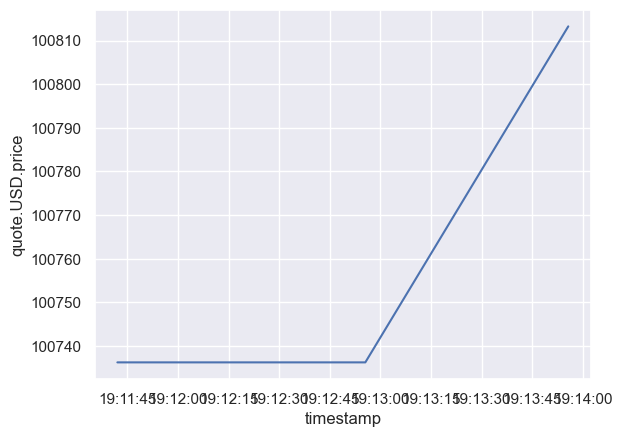

In [28]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)